In [124]:
import numpy as np
import matplotlib.pyplot as plt

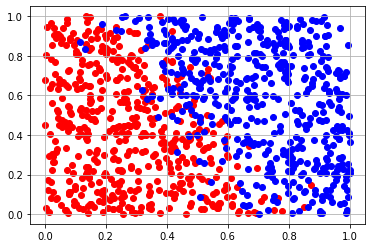

In [125]:
# generate data [x1, x2] -> 0/1, where 0 <= x < 1
def gen_data(size, noise):
    X = np.random.rand(size, 2)
    # divider: y = -2x + 1.5 + gaussian noise
    y = 1 * (X[:,1] + 2 * X[:,0] - 1.5 + np.random.normal(0, noise, size) > 0)
    return X, y
X, y = gen_data(1000, 0.2)

fig, ax = plt.subplots()
ax.scatter(X[y==0,0], X[y==0,1], c='red')
ax.scatter(X[y==1,0], X[y==1,1], c='blue')
ax.grid(True)
plt.show()

In [126]:
X = np.append(X, np.ones((1000, 1)), axis=1) # pad 1 to features
A = np.array([0, 1, 0.5]).reshape((3, 1)) # init weights

In [127]:
def sigmoid(x):
    return (1. + np.exp(-x)) ** -1

def predict(A, x):
    return 1 * (sigmoid(np.matmul(A.T, x)[0]) > 0.5)

def accuracy(A, X, y):
    return sum([predict(A, X[i]) == y[i] for i in range(len(y))]) / float(len(y))

In [128]:
curr_accuracy = accuracy(A, X, y)
print(curr_accuracy)

0.495


In [129]:
# plot the classification border(Ax=0) together with data points
line_x = np.linspace(0, 1, 10)
line_y = (line_x * A[0] + A[2]) / A[1]

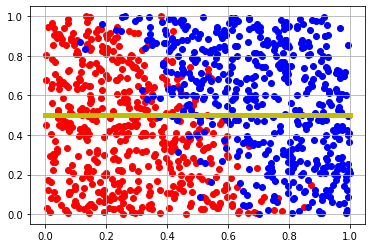

In [130]:
fig, ax = plt.subplots()
ax.plot(line_x, line_y, 'y', linewidth=5.0)
ax.scatter(X[y==0,0], X[y==0,1], c='red')
ax.scatter(X[y==1,0], X[y==1,1], c='blue')
ax.grid(True)
plt.show()